In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import seaborn as sns
from pandas import json_normalize
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from PIL import Image
import os
import re
from sklearn.metrics import silhouette_score
import torch
from transformers import BertTokenizer, BertModel
import umap
from hdbscan import HDBSCAN
import dbcv

d:\Anaconda\Lib\site-packages\transformers\utils\generic.py:481: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
d:\Anaconda\Lib\site-packages\transformers\utils\generic.py:338: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
d:\Anaconda\Lib\site-packages\transformers\utils\generic.py:338: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


In [4]:
with open("D:\instagramproject\json files\Loksabha_t.json", 'r') as file:
        json_data = json.load(file)

In [6]:
json_data[0]

{'platformId': 3.381041807e+28,
 'platform': 'Instagram',
 'date': 1717271613000,
 'updated': '2024-06-02 03:09:16',
 'type': 'photo',
 'description': '“KUHUDI” Chapter-1 This RAJA on 14th June 2024👑',
 'postUrl': 'https://www.instagram.com/p/C7r35w6yyi7/',
 'subscriberCount': 390027,
 'score': -3.748773842,
 'media': [{'type': 'photo',
   'url': 'https://scontent-sea1-1.cdninstagram.com/v/t51.29350-15/447282590_1975642436184697_1045941166712731850_n.jpg?_nc_cat=110&ccb=1-7&_nc_sid=18de74&_nc_ohc=zVZhJuwv2GcQ7kNvgFoQvjb&_nc_ht=scontent-sea1-1.cdninstagram.com&oh=00_AYB7eQsfNr7N_V6vZMc4ULgPlpIVxdH2McbMG-XqbxTdyQ&oe=66615422',
   'height': 754,
   'width': 1440}],
 'likeAndViewCountsDisabled': False,
 'languageCode': 'en',
 'legacyId': 0,
 'id': '4819179|3381041807365974203',
 'statistics.actual.favoriteCount': 1806,
 'statistics.actual.commentCount': 29,
 'statistics.expected.favoriteCount': 6758,
 'statistics.expected.commentCount': 121,
 'account.id': 4819179,
 'account.name': 'Anubha

In [5]:
df = pd.json_normalize(json_data)

# Print the DataFramez
df

,platformId,platform,date,updated,type,description,postUrl,subscriberCount,score,media,...,account.profileImage,account.subscriberCount,account.url,account.platform,account.platformId,account.verified,imageText,expandedLinks,translated_description,translated_imageText
0,3.381042e+28,Instagram,1717271613000,2024-06-02 03:09:16,photo,“KUHUDI” Chapter-1 This RAJA on 14th June 2024👑,https://www.instagram.com/p/C7r35w6yyi7/,390027,-3.748774,"[{'type': 'photo', 'url': 'https://scontent-se...",...,https://scontent-sea1-1.cdninstagram.com/v/t51...,390002,https://www.instagram.com/anubhavmohantyofficial/,Instagram,5783886639,True,None,None,“KUHUDI” Chapter-1 This RAJA on 14th June 2024👑,None
1,3.380915e+28,Instagram,1717256458000,2024-06-02 03:09:16,photo,Bhai is so kind to KIDS in real life.In reel l...,https://www.instagram.com/p/C7ra_xaJlr0/,390027,-1.498852,"[{'type': 'photo', 'url': 'https://scontent-se...",...,https://scontent-sea1-1.cdninstagram.com/v/t51...,390002,https://www.instagram.com/anubhavmohantyofficial/,Instagram,5783886639,True,None,None,Bhai is so kind to kids in real life.in reel l...,None
2,3.380885e+29,Instagram,1717252939000,2024-06-02 03:32:58,photo,वाराणसी (उत्तरप्रदेश) में स्थित श्री काशी विश्...,https://www.instagram.com/p/C7rUSNgvQBK/,27229,17.000000,"[{'type': 'photo', 'url': 'https://scontent-se...",...,https://scontent-sea1-1.cdninstagram.com/v/t51...,27300,https://www.instagram.com/iveenadevi/,Instagram,12906038168,True,‎'‎श्री काशीविशवनाय काशी विश्वनाय मनिदिर मनिदि...,None,He duly worshiped with his children at Shri Ka...,'Shri Kashiwishvanay Kashi Vishidir Manidir Ma...
3,3.380859e+28,Instagram,1717249804000,2024-06-02 04:42:35,album,वृक्षवल्ली आम्हा सोयरे वनचरे !\n\nसंत तुकोबारा...,https://www.instagram.com/p/C7rOTjQI2A6/,1717574,4.400247,"[{'type': 'photo', 'url': 'https://scontent-se...",...,https://scontent-sea1-1.cdninstagram.com/v/t51...,1717528,https://www.instagram.com/mieknathshinde/,Instagram,3412414227,True,None,None,Tree tree we have solery forests!\n\nThe same ...,None
4,3.380858e+28,Instagram,1717249643000,2024-06-02 05:03:47,album,"Judega Bharat, Jeetega INDIA! 🇮🇳",https://www.instagram.com/p/C7rN_2Qi1VN/,8718529,3.917269,"[{'type': 'photo', 'url': 'https://scontent-se...",...,https://scontent-sea1-1.cdninstagram.com/v/t51...,8788488,https://www.instagram.com/rahulgandhi/,Instagram,1132557230,True,None,None,,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15348,3.203701e+28,Instagram,1696130921000,2024-05-18 08:26:06,album,माननीय प्रधानमंत्रीजी श्री @narendramodi jÍ द्...,https://www.instagram.com/p/Cx11O2DL4xx/,44329,-1.520408,"[{'type': 'photo', 'url': 'https://scontent-se...",...,https://scontent-sea1-1.cdninstagram.com/v/t51...,59746,https://www.instagram.com/girirajsinghbjp/,Instagram,3161328178,True,None,None,Honorable Prime Ministerji Shri @narendramodi ...,None
15349,3.203686e+28,Instagram,1696129211000,2024-05-18 08:26:06,album,जय महादेव।,https://www.instagram.com/p/Cx1x-LHRpe9/,44329,-1.419048,"[{'type': 'photo', 'url': 'https://scontent-se...",...,https://scontent-sea1-1.cdninstagram.com/v/t51...,59746,https://www.instagram.com/girirajsinghbjp/,Instagram,3161328178,True,None,None,Jai Mahadev.,None
15350,3.203659e+28,Instagram,1696125936000,2024-05-17 19:07:18,album,Tawang Marathon is one of the most exciting ma...,https://www.instagram.com/p/Cx1ruV2B-Zm/,721773,-1.580842,"[{'type': 'photo', 'url': 'https://scontent-se...",...,https://scontent-sea1-1.cdninstagram.com/v/t51...,1261131,https://www.instagram.com/kiren.rijiju/,Instagram,3938691650,True,None,None,Tawang Marathon is one of the most exciting ma...,None
15351,3.203603e+28,Instagram,1696119201000,2024-05-20 13:25:04,photo,"प्रतिभावंत साहित्यिक, गीतकार ग. दि. माडगूळकर य...",https://www.instagram.com/p/Cx1e4KsPsjN/,3417396,-1.780193,"[{'type': 'photo', 'url': 'https://scontent-se...",...,https://scontent-sea1-1.cdninstagram.com/v/t51...,5499029,https://www.instagram.com/gadkar

In [ ]:
df['date'] = pd.to_datetime(df['date'], unit='ms')
df['year_month'] = df['date'].dt.to_period('M')
total_counts = df.groupby('year_month').size().reset_index(name='total_count')

def check_conditions(image_paths):
    if image_paths and image_paths[0] is not None:
        return True
    return False
condition_counts = df[df['Image_path'].apply(check_conditions)]
condition_counts = condition_counts.groupby('year_month').size().reset_index(name='condition_count')
merged_counts = pd.merge(total_counts, condition_counts, on='year_month', how='left')
merged_counts['condition_count'] = merged_counts['condition_count'].fillna(0)

merged_counts['percentage'] = (merged_counts['condition_count'] / merged_counts['total_count']) * 100

total_fetched_posts = merged_counts['condition_count'].sum()
total_posts = merged_counts['total_count'].sum()
fetched_ratio = total_fetched_posts / total_posts

# Print the fetched ratio
print(f"Ratio of Total number of posts by Total number of fetched images: {fetched_ratio:.2f}")

fig = go.Figure()
fig.add_trace(go.Bar(
    name='Total Number of posts',
    x=merged_counts['year_month'].astype(str),
    y=merged_counts['total_count'],
    marker_color='violet',
    text=merged_counts['total_count'],  # Add text for annotations
    textposition='outside'
))
fig.add_trace(go.Bar(
    name='Number of images fetched',
    x=merged_counts['year_month'].astype(str),
    y=merged_counts['condition_count'],
    marker_color='turquoise',
    text=merged_counts['condition_count'],  # Add text for annotations
    textposition='outside'
))
fig.add_trace(go.Bar(
    name='Percentage of images fetched',
    x=merged_counts['year_month'].astype(str),
    y=merged_counts['percentage'],
    marker_color='lightgreen',
    text=merged_counts['percentage'].apply(lambda x: f'{x:.2f}%'),  # Format as percentage
    textposition='outside'
))
fig.update_layout(
    title='Image statistics',
    xaxis_title='Month',
    yaxis_title='Count',
    barmode='group'  # Group the bars side by side
)

# Show the plot
fig.show()

In [8]:
df = df.drop_duplicates(subset='id', keep='first')

In [9]:
temp_path = "json files"
if not os.path.exists(temp_path):
        print(f"directory exits {temp_path}")
else:
        print("not exist")

directory exits json files


In [10]:
df['media_type'] = df['media'].apply(lambda x: type(x))

In [11]:
df['media_type'].value_counts()

media_type
<class 'list'>        15350
<class 'NoneType'>        3
Name: count, dtype: int64

In [12]:
df[df['type']=="video"]

,platformId,platform,date,updated,type,description,postUrl,subscriberCount,score,media,...,account.url,account.platform,account.platformId,account.verified,imageText,expandedLinks,translated_description,translated_imageText,year_month,media_type
163,3.377213e+28,Instagram,2024-05-27 13:06:34,2024-06-01 16:56:10,video,जैसे मोदी जी की एक योजना से आपके घर मुफ़्त राश...,https://www.instagram.com/p/C7eRV3Wxq7b/,59217,-5.422018,"[{'type': 'video', 'url': 'https://scontent-se...",...,https://www.instagram.com/girirajsinghbjp/,Instagram,3161328178,True,None,None,Just like a free ration from a plan of Modi ji...,None,2024-05,<class 'list'>
164,3.377212e+28,Instagram,2024-05-27 13:04:38,2024-06-01 16:56:10,video,जैसे मोदी जी के द्वारा एक बटन दबाने पर किसानों...,https://www.instagram.com/p/C7eRHprJWFu/,59217,-7.986486,"[{'type': 'video', 'url': 'https://scontent-se...",...,https://www.instagram.com/girirajsinghbjp/,Instagram,3161328178,True,None,None,"Just as Modi ji presses a button, 6000 directl...",None,2024-05,<class 'list'>
165,3.377211e+28,Instagram,2024-05-27 13:03:22,2024-06-01 23:50:04,video,जैसे मोदी जी के द्वारा एक बटन दबाने पर बुजुर्ग...,https://www.instagram.com/p/C7eQ-SAhYTu/,59217,-4.345588,"[{'type': 'video', 'url': 'https://scontent-se...",...,https://www.instagram.com/girirajsinghbjp/,Instagram,3161328178,True,None,None,"Just as Modi ji presses a button, the petition...",None,2024-05,<class 'list'>
886,3.367697e+28,Instagram,2024-05-14 10:00:58,2024-05-21 04:01:35,video,मोदी जी का साफ़ कहना है की जब तक वो ज़िंदा हैं...,https://www.instagram.com/p/C68dvyJi2_f/,58943,-2.198630,"[{'type': 'video', 'url': 'https://scontent-se...",...,https://www.instagram.com/girirajsinghbjp/,Instagram,3161328178,True,None,None,Modi ji clearly says that as long as he is ali...,None,2024-05,<class 'list'>
1067,3.366183e+28,Instagram,2024-05-12 07:51:39,2024-05-20 10:59:10,video,बेगूसराय के लोगों के लिए श्री @iChiragPaswan क...,https://www.instagram.com/p/C63FW0lCj_w/,58834,2.744620,"[{'type': 'video', 'url': 'https://scontent-se...",...,https://www.instagram.com/girirajsinghbjp/,Instagram,3161328178,True,None,None,Message of Mr. @chiraagpaswan for the people o...,None,2024-05,<class 'list'>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15057,3.206828e+28,Instagram,2023-10-05 11:02:23,2024-05-18 08:26:03,video,#KailashpatiMishraShatabdi के अवसर पर बापू सभा...,https://www.instagram.com/p/CyA8Tp6hAbx/,44623,2.474785,"[{'type': 'video', 'url': 'https://scontent-se...",...,https://www.instagram.com/girirajsinghbjp/,Instagram,3161328178,True,None,None,Bapu Auditorium echoed on the occasion of #Kai...,None,2023-10,<class 'list'>
15072,3.206728e+28,Instagram,2023-10-05 07:43:43,2024-05-18 08:24:06,video,None,https://www.instagram.com/tv/CyAlkqySsmv/,230558,7.868683,"[{'type': 'video', 'url': 'https://scontent-se...",...,https://www.instagram.com/gssjodhpur/,Instagram,1559374716,True,None,None,None,None,2023-10,<class 'list'>
15077,3.206712e+28,Instagram,2023-10-05 07:10:34,2024-05-18 08:26:03,video,माननीय राष्ट्रीय अध्यक्ष श्री जेपी नड्डा जी का...,https://www.instagram.com/p/CyAhy4Mroa_/,44623,2.872079,"[{'type': 'video', 'url': 'https://scontent-se...",...,https://www.instagram.com/girirajsinghbjp/,Instagram,3161328178,True,None,None,Honorable National President Shri JP Nadda ji ...,None,2023-10,<class 'list'>
15135,3.205889e+28,Instagram,2023-10-04 03:57:07,2024-04-26 08:25:13,video,རྟགས་དང་རྟེན་འབྲེལ་བཟང་པོ།\n\nཞག་དང་ཉི་མ་མང་པོ...,https://www.instagram.com/tv/Cx9m3hLAwm7/,44419,-1.906087,"[{'type': 'video', 'url': 'https://video-sea1-...",...,https://www.instagram.com/jtnladakh.in/,Instagram,3882459136,True,None,None,རྟགས་དང་རྟེན་འབྲེལ་བཟང་པོ།\n\nཞག་དང་ཉི་མ་མང་པོ...,None,2023-10,<class 'list'>


In [33]:
def preprocess_text(text):
    if not isinstance(text, str):
        return ""
    
    # Remove emojis
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # Emoticons
                               u"\U0001F300-\U0001F5FF"  # Symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # Transport & map symbols
                               u"\U0001F700-\U0001F77F"  # Alchemical symbols
                               u"\U0001F780-\U0001F7FF"  # Geometric Shapes
                               u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                               u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                               u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                               u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                               u"\U00002702-\U000027B0"  # Dingbats
                               "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)
    
    # Remove mentions and hashtags
    # text = re.sub(r'@\w+', '', text)  # Remove mentions
    text = re.sub(r'#\w+', '', text)  # Remove hashtags
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove punctuation (except for underscores which are often used in hashtags/mentions)
    text = re.sub(r'[^\w\s]', '', text)
    
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

# Translated description


In [14]:
df['translated_description'] = df['translated_description'].apply(preprocess_text)

In [29]:
df.columns

Index(['platformId', 'platform', 'date', 'updated', 'type', 'description',
       'postUrl', 'subscriberCount', 'score', 'media',
       'likeAndViewCountsDisabled', 'languageCode', 'legacyId', 'id',
       'statistics.actual.favoriteCount', 'statistics.actual.commentCount',
       'statistics.expected.favoriteCount', 'statistics.expected.commentCount',
       'account.id', 'account.name', 'account.handle', 'account.profileImage',
       'account.subscriberCount', 'account.url', 'account.platform',
       'account.platformId', 'account.verified', 'imageText', 'expandedLinks',
       'translated_description', 'translated_imageText', 'description_cluster',
       'Image_path', 'image_ocr', 'translated_image_ocr'],
      dtype='object')

In [16]:
desc_df = df['translated_description']

In [22]:
tdf = df[['translated_description']]
tdf.to_csv("../data dir/translated_desc.csv")

In [8]:
df = pd.read_csv("../data dir/translated_description_Left.csv")

In [10]:
tdf = df[['translated_description']]
tdf.apply(preprocess_text)
tdf

,translated_description
0,He duly worshiped with his children at Shri Ka...
1,I am overwhelmed by getting hospitality in the...
2,"Jai Shri Ram!\n\nToday, in the holy city of Ay..."
3,"Today, I urge all the voters of the holy city ..."
4,"In Ghosi Lok Sabha, votes appealed to the publ..."
...,...
1767,Greetings to him on the birth anniversary of t...
1768,NaN
1769,Today I inaugurated the road built under #PMGS...
1770,I will never let this belief of all of you break.


In [39]:
tdf.to_csv("../data dir/translated_ocr.csv")

In [34]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained("bert-base-uncased")

In [35]:
def get_bert_embeddings(text, tokenizer, model):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state[:, 0, :].numpy()  # Use the [CLS] token

In [13]:
desc_embeddings = np.vstack([get_bert_embeddings(text, tokenizer, model) for text in tdf])

In [ ]:
np.save('../data dir/desc_embeddings.npy', desc_embeddings)

In [9]:
desc_embeddings = np.load('../data dir/desc_embeddings.npy')

In [14]:
desc_embeddings.shape

(1, 768)

In [11]:
reducer = umap.UMAP(n_components=128, random_state=42)
desc_reduced_embeddings = reducer.fit_transform(desc_embeddings)

d:\Anaconda\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [12]:
desc_reduced_embeddings = desc_reduced_embeddings.astype(np.float32)

In [22]:
Hdbscan = HDBSCAN(min_cluster_size=11)
cluster_labels = Hdbscan.fit_predict(desc_reduced_embeddings)

In [23]:
desc_reduced_embeddings.shape

(15353, 10)

In [13]:

final_dbcv_scores = []
final_cluster_sizes = []

In [4]:

def validate_using_dbcv(desc_reduced_embeddings):
    csize = 5
    results = []
    numberOClusters = []
    while csize <= 50:
        print(f"Trying min_cluster_size = {csize}")
        try:
            Hdbscan = HDBSCAN(min_cluster_size=csize)
            cluster_labels = Hdbscan.fit_predict(desc_reduced_embeddings)
            
            # Check if the clustering resulted in any clusters
            unique_labels = set(cluster_labels)
            print(f"Unique labels: {unique_labels}")
            numberOClusters.append(len(unique_labels)-1)
            
            # Calculate the score only if there are valid clusters
            if len(unique_labels) > 1 or (-1 in unique_labels and len(unique_labels) > 2):
                score = dbcv.dbcv(desc_reduced_embeddings, cluster_labels, noise_id=-1)
                results.append(score)
                print(f"DBCV Score for min_cluster_size = {csize}: {score}")
            else:
                print(f"Invalid clustering for min_cluster_size = {csize}")
                numberOClusters.append(1)
                results.append(1)
            
        except Exception as e:
            print(f"Failed for min_cluster_size = {csize} with error: {e}")
            results.append(1)
            numberOClusters.append(0)
        
        csize += 1
        
    return results, numberOClusters

In [ ]:
dbcv_scores, numberOClusters = validate_using_dbcv(desc_reduced_embeddings)
print(dbcv_scores)

In [51]:
final_dbcv_scores.append(dbcv_scores)
final_cluster_sizes.append(numberOClusters)

In [52]:
final_cluster_sizes

[[357,
  296,
  253,
  217,
  207,
  189,
  166,
  150,
  136,
  132,
  125,
  117,
  110,
  105,
  99,
  91,
  87,
  80,
  55,
  72,
  69,
  65,
  62,
  64,
  58,
  58,
  58,
  57,
  54,
  55,
  54,
  54,
  51,
  50,
  50,
  49,
  49,
  48,
  47,
  46,
  46,
  44,
  43,
  43,
  41,
  8,
  0],
 [357,
  296,
  253,
  217,
  207,
  189,
  166,
  150,
  136,
  132,
  125,
  117,
  110,
  105,
  99,
  91,
  87,
  80,
  55,
  72,
  69,
  65,
  62,
  64,
  58,
  58,
  58,
  57,
  54,
  55,
  54,
  54,
  51,
  50,
  50,
  49,
  49,
  48,
  47,
  46,
  46,
  44,
  43,
  43,
  41,
  8,
  0]]

In [62]:
import numpy as np
import plotly.graph_objects as go

def plot_dbcv_plot(x, dbcv_scores, numberOClusters):
    min_score_index = np.argmin(dbcv_scores)
    min_score_x = x[min_score_index]
    min_score_y = dbcv_scores[min_score_index]

    # Create the plot
    fig = go.Figure()

    # Plot final_dbcv_scores
    fig.add_trace(go.Scatter(x=x, y=dbcv_scores, mode='lines+markers', name='DBCV Scores'))

    # Plot final_cluster_sizes
    # fig.add_trace(go.Scatter(x=x, y=numberOClusters, mode='lines+markers', name='Cluster Sizes'))

    # Add a vertical line at the point of maximum dbcv score
    fig.add_vline(x=min_score_x, line=dict(color='red', dash='dash'), annotation_text='Optimal DBCV Score')

    # Add annotation for the maximum score
    fig.add_annotation(x=min_score_x, y=min_score_y,
                    text=f"Min DBCV Score: {min_score_y:.2f}",
                    showarrow=True, arrowhead=2, ax=-40, ay=-40)

    # Update layout
    fig.update_layout(title="DBCV Scores and Cluster Sizes",
                    xaxis_title="X Axis",
                    yaxis_title="Values",
                    legend_title="Legend")

    # Show the plot
    fig.show()

In [41]:
x = np.arange(5, 51, 1)
plot_dbcv_plot(x, dbcv_scores, numberOClusters)

dimention = 2

In [47]:
x = np.arange(5, 51, 1)
plot_dbcv_plot(x, dbcv_scores, numberOClusters)

dimention = 10

In [52]:
x = np.arange(5, 51, 1)
plot_dbcv_plot(x, dbcv_scores, numberOClusters)

dimention = 128

In [71]:
def get_noise_points(reduced_embeddings, iters):
    noise_points = {}
    for iter in range(2, iters+1):
        Hdbscan = HDBSCAN(min_cluster_size=iter)
        cluster_labels = Hdbscan.fit_predict(reduced_embeddings)
        
        negtive_ones = np.sum(cluster_labels==-1)
        noise_points[iter] = negtive_ones
    return noise_points
    
noise_points = get_noise_points(reduced_embeddings, 1000)
noise_points

{2: 5280,
 3: 6047,
 4: 6731,
 5: 6891,
 6: 7098,
 7: 6813,
 8: 6796,
 9: 6867,
 10: 7058,
 11: 7155,
 12: 7375,
 13: 7288,
 14: 7352,
 15: 7201,
 16: 7378,
 17: 7403,
 18: 7040,
 19: 7261,
 20: 7092,
 21: 7184,
 22: 7434,
 23: 7466,
 24: 7592,
 25: 7481,
 26: 7404,
 27: 7686,
 28: 7766,
 29: 7817,
 30: 7671,
 31: 7780,
 32: 7809,
 33: 7713,
 34: 7925,
 35: 7818,
 36: 7839,
 37: 7896,
 38: 7687,
 39: 7714,
 40: 7668,
 41: 7800,
 42: 7689,
 43: 8037,
 44: 8098,
 45: 8125,
 46: 8021,
 47: 8425,
 48: 8427,
 49: 8210,
 50: 8533,
 51: 196,
 52: 196,
 53: 196,
 54: 196,
 55: 196,
 56: 196,
 57: 196,
 58: 196,
 59: 255,
 60: 255,
 61: 255,
 62: 255,
 63: 255,
 64: 255,
 65: 255,
 66: 255,
 67: 255,
 68: 261,
 69: 255,
 70: 255,
 71: 255,
 72: 261,
 73: 262,
 74: 262,
 75: 262,
 76: 262,
 77: 262,
 78: 262,
 79: 260,
 80: 260,
 81: 262,
 82: 262,
 83: 262,
 84: 262,
 85: 262,
 86: 262,
 87: 262,
 88: 262,
 89: 262,
 90: 262,
 91: 262,
 92: 262,
 93: 262,
 94: 262,
 95: 262,
 96: 262,
 97: 262,

In [72]:
x_values = list(noise_points.keys())
y_values = list(noise_points.values())

# Create a line plot
fig = go.Figure()

fig.add_trace(go.Scatter(x=x_values, y=y_values, mode='lines+markers', name='Data Line'))

# Set plot title and labels
fig.update_layout(
    title='minimum cluster size VS number of noise points',
    xaxis_title='min cluster size',
    yaxis_title='No. of noise points'
)

# Show the plot
fig.show()

any number between 157 to 204 gives lowest number of noise points

In [61]:

def evaluate_min_cluster_size(data, min_cluster_sizes):
    silhouette_scores = []
    cluster_counts = []
    for size in min_cluster_sizes:
        clusterer = HDBSCAN(min_cluster_size=size)
        labels = clusterer.fit_predict(data)
        
        if len(set(labels)) > 1:  # Ensure there is more than one cluster
            silhouette_avg = silhouette_score(data, labels)
        else:
            silhouette_avg = -1  # Invalid silhouette score if only one cluster

        silhouette_scores.append(silhouette_avg)
        cluster_counts.append(len(set(labels)) - (1 if -1 in labels else 0))  # Exclude noise

    return silhouette_scores, cluster_counts

In [62]:
min_cluster_sizes = range(5, 1000, 5)
silhouette_scores, cluster_counts = evaluate_min_cluster_size(desc_reduced_embeddings, min_cluster_sizes)

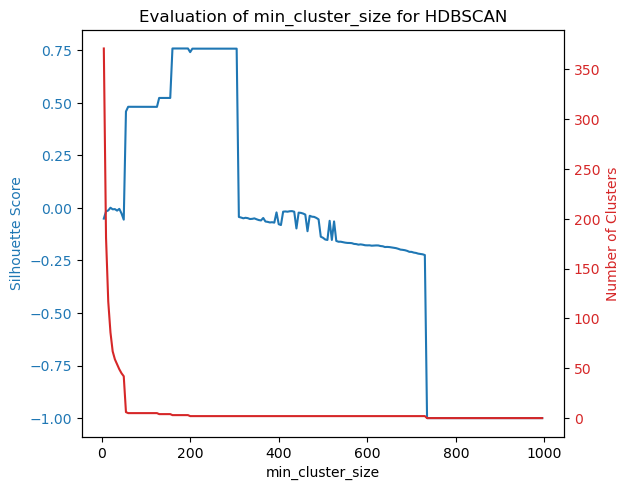

In [66]:
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('min_cluster_size')
ax1.set_ylabel('Silhouette Score', color=color)
ax1.plot(min_cluster_sizes, silhouette_scores, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # Instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Number of Clusters', color=color)  # We already handled the x-label with ax1
ax2.plot(min_cluster_sizes, cluster_counts, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # Otherwise the right y-label is slightly clipped
plt.title('Evaluation of min_cluster_size for HDBSCAN')
plt.show()

In [49]:
import dbcv
def dbcv_eval(data, min_cluster_sizes):
    dbcv_scores = []
    cluster_counts = []

    # Process in batches
    for size in min_cluster_sizes:
            clusterer = HDBSCAN(min_cluster_size=size)
            labels = clusterer.fit_predict(data)
            
            if len(set(labels)) > 1:  # Ensure there is more than one cluster
                dbcv_score = dbcv.dbcv(data, labels, noise_id=-1)
            else:
                dbcv_score = -1  # Invalid DBCV score if only one cluster

            dbcv_scores.append(dbcv_score)
            cluster_counts.append(len(set(labels)) - (1 if -1 in labels else 0))  # Exclude noise

    return dbcv_scores, cluster_counts

In [50]:
dbcv_scores_final=[[0.349083377994394,
  0.3855804742642548,
  0.3926919575482743,
  0.39526988645794786,
  0.38667136361641763,
  0.3329652792444381,
  0.33777622232764165,
  0.29858521102119295,
  0.2765037626515669,
  0.33910984846496156,
  ]]

In [51]:
dbcv_scores

[0.33910984846496156]

In [ ]:
min_cluster_sizes = range(5, 1000, 5)
dbcv_scores, cluster_counts = dbcv_eval(desc_reduced_embeddings, min_cluster_sizes)

In [ ]:
import numpy as np
import hdbscan
from sklearn.decomposition import PCA
import dbcv
import logging

# Initialize logging
logging.basicConfig(level=logging.INFO)

def dbcv_eval(reduced_data, min_cluster_sizes, n_components=50):
    dbcv_scores = []
    cluster_counts = []

    for size in min_cluster_sizes:
        try:
            clusterer = hdbscan.HDBSCAN(min_cluster_size=size)
            labels = clusterer.fit_predict(reduced_data)
            
            if len(set(labels)) > 1:  # Ensure there is more than one cluster
                dbcv_score = dbcv.dbcv(reduced_data, labels, noise_id=-1)
            else:
                dbcv_score = -1  # Invalid DBCV score if only one cluster

            dbcv_scores.append(dbcv_score)
            cluster_counts.append(len(set(labels)) - (1 if -1 in labels else 0))  # Exclude noise

        except MemoryError as e:
            logging.error(f"MemoryError at min_cluster_size={size}: {e}")
            dbcv_scores.append(None)  # Indicate failure
            cluster_counts.append(0)

    return dbcv_scores, cluster_counts

min_cluster_sizes = range(5, 1000, 5)
dbcv_scores, cluster_counts = dbcv_eval(desc_reduced_embeddings, min_cluster_sizes)

# Filter out None scores for further analysis
filtered_dbcv_scores = [score for score in dbcv_scores if score is not None]
filtered_cluster_counts = [count for i, count in enumerate(cluster_counts) if dbcv_scores[i] is not None]

logging.info(f"DBCV Scores: {filtered_dbcv_scores}")
logging.info(f"Cluster Counts: {filtered_cluster_counts}")

In [ ]:
dbcv_scores_final.append(dbcv_scores)

In [34]:
min_cluster_sizes1

[50]

In [28]:
dbcv_scores_final

[[0.349083377994394,
  0.3855804742642548,
  0.3926919575482743,
  0.39526988645794786,
  0.38667136361641763,
  0.3329652792444381,
  0.33777622232764165,
  0.29858521102119295,
  0.2765037626515669]]

In [68]:
best_min_cluster_size = min_cluster_sizes[np.argmax(silhouette_scores)]
print(f"Best min_cluster_size: {best_min_cluster_size}")

def plot_cluster_points(best_min_cluster_size, reduced_embeddings):
    best_clusterer = HDBSCAN(min_cluster_size=best_min_cluster_size)
    labels = best_clusterer.fit_predict(reduced_embeddings)

    reducer = umap.UMAP(n_components=2)
    embedding = reducer.fit_transform(reduced_embeddings)

    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1], hue=labels, palette='viridis', s=50)
    plt.title(f"Clusters with min_cluster_size={best_min_cluster_size}")
    plt.show()
    


Best min_cluster_size: 160


d:\Anaconda\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:392: UserWarning:

Exited at iteration 2000 with accuracies 
[7.71670999e-14 5.24453237e-07 5.77986492e-07 4.72954796e-06]
not reaching the requested tolerance 2.9653310775756836e-06.
Use iteration 1923 instead with accuracy 
1.210335105104103e-06.


d:\Anaconda\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:392: UserWarning:

Exited postprocessing with accuracies 
[5.21555083e-14 5.35593801e-07 5.30359234e-07 3.77538915e-06]
not reaching the requested tolerance 2.9653310775756836e-06.



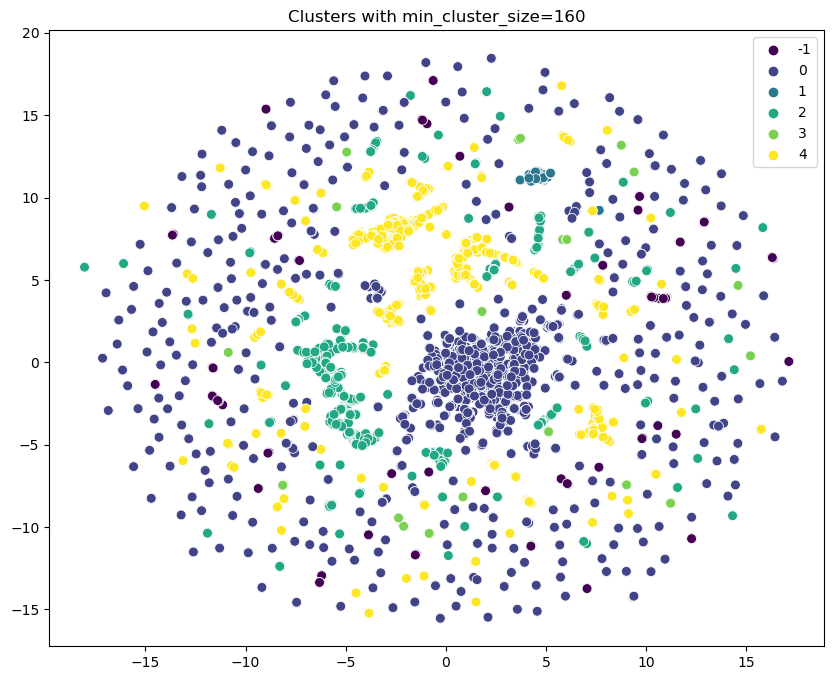

In [65]:
plot_cluster_points(best_min_cluster_size, reduced_embeddings)

d:\Anaconda\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:392: UserWarning:

Exited at iteration 2000 with accuracies 
[3.11344808e-15 6.08732526e-07 2.00420492e-06 4.30101550e-05]
not reaching the requested tolerance 2.9802322387695312e-06.
Use iteration 1642 instead with accuracy 
1.8799331568018744e-06.


d:\Anaconda\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:392: UserWarning:

Exited postprocessing with accuracies 
[2.94583606e-15 7.01959785e-07 1.75821769e-06 5.05957424e-06]
not reaching the requested tolerance 2.9802322387695312e-06.



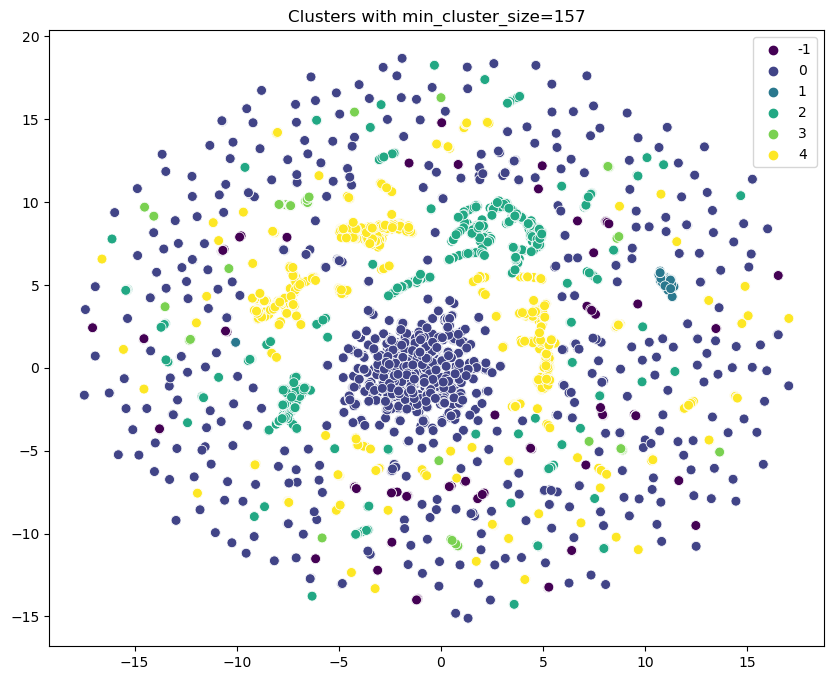

In [73]:
plot_cluster_points(157, reduced_embeddings)

In [ ]:
for cluster in range(5, 50, 5):
    plot_cluster_points(cluster, reduced_embeddings)


In [69]:
import re
import os
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder

import torch
from transformers import BertTokenizer, BertModel

import umap
import hdbscan
import plotly.express as px
from scipy.cluster.hierarchy import linkage, fcluster

def get_top_n_words(text_series, n=3):
    """
    Get the top n most frequent words from a pandas Series of text.
    """
    text_series = text_series.dropna().astype(str)
    all_text = ' '.join(text_series)
    all_text = re.sub(r'\W+', ' ', all_text)
    
    if all_text.strip() == '':
        return ['N/A']
    
    vectorizer = CountVectorizer(stop_words='english')
    bag_of_words = vectorizer.fit_transform([all_text])
    
    if not vectorizer.vocabulary_:
        return ['N/A']
    
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    
    return [word for word, freq in words_freq[:n]]

def compute_jaccard_similarity(list1, list2):
    set1, set2 = set(list1), set(list2)
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return intersection / union

def assign_colors_based_on_similarity(top_words, clusters):
    n_clusters = len(clusters)
    similarity_matrix = np.zeros((n_clusters, n_clusters))

    for i, cluster_i in enumerate(clusters):
        for j, cluster_j in enumerate(clusters):
            if i <= j:
                similarity_matrix[i, j] = compute_jaccard_similarity(top_words[cluster_i], top_words[cluster_j])
                similarity_matrix[j, i] = similarity_matrix[i, j]

    Z = linkage(1 - similarity_matrix, method='average')
    labels = fcluster(Z, t=0.5, criterion='distance')
    le = LabelEncoder()
    colors = le.fit_transform(labels)

    return colors

def plot_text_cluster_temp(reduced_embeddings, n, df):
    best_clusterer = HDBSCAN(min_cluster_size=n)
    labels = best_clusterer.fit_predict(reduced_embeddings)

    reducer = umap.UMAP(n_components=2)
    embedding = reducer.fit_transform(reduced_embeddings)

    tdf = pd.DataFrame(embedding, columns=['UMAP1', 'UMAP2'])
    tdf['Cluster'] = labels
    tdf['text'] = df['translated_description']
    
    centroids = tdf.groupby('Cluster')[['UMAP1', 'UMAP2']].mean().reset_index()
    sizes = tdf['Cluster'].value_counts().reset_index()
    sizes.columns = ['Cluster', 'Size']

    centroids = centroids.merge(sizes, on='Cluster')

    top_words = {}
    for cluster in centroids['Cluster']:
        cluster_texts = tdf[tdf['Cluster'] == cluster]['text']
        top_words[cluster] = get_top_n_words(cluster_texts)

    centroids['TopWords'] = centroids['Cluster'].apply(lambda cluster: ' '.join(top_words[cluster]))
    centroids['Color'] = assign_colors_based_on_similarity(top_words, centroids['Cluster'])

    fig = px.scatter(centroids, x='UMAP1', y='UMAP2', size='Size', color='Color',
                     title=f"Clusters with min_cluster_size={n}",
                     labels={'Cluster': 'Cluster'},
                     opacity=0.7,
                     hover_data={'TopWords': True})

    fig.update_layout(height=800)

    fig.update_traces(marker=dict(line=dict(width=2, color='DarkSlateGrey'), sizemode='area', sizeref=2.*max(centroids['Size'])/(100.**2), sizemin=4))
    fig.show()

In [70]:

plot_text_cluster_temp(reduced_embeddings, 20, df)


d:\Anaconda\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:392: UserWarning:

Exited postprocessing with accuracies 
[2.33721674e-15 2.66653625e-06 6.56238140e-07 3.50211243e-06]
not reaching the requested tolerance 2.9653310775756836e-06.

C:\Users\hp\AppData\Local\Temp\ipykernel_8040\4282420310.py:55: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



In [72]:
plot_text_cluster_temp(reduced_embeddings, 157, df)

C:\Users\hp\AppData\Local\Temp\ipykernel_8040\4282420310.py:55: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



In [71]:
plot_text_cluster_temp(reduced_embeddings, 160, df)


C:\Users\hp\AppData\Local\Temp\ipykernel_8040\4282420310.py:55: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



# OCR Text

In [9]:
df = pd.read_json('D:\instagramproject\json files\Loksabha_translated_ocr.json')

In [15]:
candidates = pd.read_csv('../Lok_sabha_contestents.csv')

In [16]:
df = pd.merge(df, candidates[['accountHandle', 'party', 'Alignation']], left_on='account.handle', right_on = "accountHandle", how='left')

In [17]:
df

,platformId,platform,date,updated,type,description,postUrl,subscriberCount,score,media,...,expandedLinks,translated_description,translated_imageText,description_cluster,Image_path,image_ocr,translated_image_ocr,accountHandle,party,Alignation
0,3.381042e+28,Instagram,2024-06-01 19:53:33,2024-06-02 03:09:16,photo,“KUHUDI” Chapter-1 This RAJA on 14th June 2024👑,https://www.instagram.com/p/C7r35w6yyi7/,390027,-3.748774,"[{'type': 'photo', 'url': 'https://scontent-se...",...,None,kuhudi chapter1 this raja on 14th june 2024,None,-1,[../images\image_0_0.jpg],"ASK mt MAR RNY: SORT messy on\n\nomc ST TTHAK,...","ASK mt MAR RNY: SORT messy on\n\nomc ST TTHAK,...",anubhavmohantyofficial,BJD,Centre
1,3.380915e+28,Instagram,2024-06-01 15:40:58,2024-06-02 03:09:16,photo,Bhai is so kind to KIDS in real life.In reel l...,https://www.instagram.com/p/C7ra_xaJlr0/,390027,-1.498852,"[{'type': 'photo', 'url': 'https://scontent-se...",...,None,bhai is so kind to kids in real lifein reel li...,None,101,[../images\image_1_0.jpg],CAMERA QUEEN PRODUCTION\n\naw LyRit VIDEO’ 3 4...,CAMERA QUEEN PRODUCTION\n\n‘LyRit VIDEO’ 3 4\n...,anubhavmohantyofficial,BJD,Centre
2,3.380885e+29,Instagram,2024-06-01 14:42:19,2024-06-02 03:32:58,photo,वाराणसी (उत्तरप्रदेश) में स्थित श्री काशी विश्...,https://www.instagram.com/p/C7rUSNgvQBK/,27229,17.000000,"[{'type': 'photo', 'url': 'https://scontent-se...",...,None,he duly worshiped with his children at shri ka...,'Shri Kashiwishvanay Kashi Vishidir Manidir Ma...,158,[../images\image_2_0.jpg],,,iveenadevi,LJSP,Left
3,3.380859e+28,Instagram,2024-06-01 13:50:04,2024-06-02 04:42:35,album,वृक्षवल्ली आम्हा सोयरे वनचरे !\n\nसंत तुकोबारा...,https://www.instagram.com/p/C7rOTjQI2A6/,1717574,4.400247,"[{'type': 'photo', 'url': 'https://scontent-se...",...,None,tree tree we have solery forests\n\nthe same l...,None,-1,[../images\image_3_0.jpg],,,mieknathshinde,SS,Right
4,3.380858e+28,Instagram,2024-06-01 13:47:23,2024-06-02 05:03:47,album,"Judega Bharat, Jeetega INDIA! 🇮🇳",https://www.instagram.com/p/C7rN_2Qi1VN/,8718529,3.917269,"[{'type': 'photo', 'url': 'https://scontent-se...",...,None,,None,5,[../images\image_4_0.jpg],,,rahulgandhi,INC,Centre
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15348,3.203701e+28,Instagram,2023-10-01 03:28:41,2024-05-18 08:26:06,album,माननीय प्रधानमंत्रीजी श्री @narendramodi jÍ द्...,https://www.instagram.com/p/Cx11O2DL4xx/,44329,-1.520408,"[{'type': 'photo', 'url': 'https://scontent-se...",...,None,honorable prime ministerji shri narendramodi j...,None,141,[../images\image_15348_0.jpg],"सिर्फ बजट नहीं लाता बदलाव, संसाधन\nके सही प्रय...","सिर्फ बजट नहीं लाता बदलाव, संसाधन\nके सही प्रय...",girirajsinghbjp,BJP,Right
15349,3.203686e+28,Instagram,2023-10-01 03:00:11,2024-05-18 08:26:06,album,जय महादेव।,https://www.instagram.com/p/Cx1x-LHRpe9/,44329,-1.419048,"[{'type': 'photo', 'url': 'https://scontent-se...",...,None,jai mahadev,None,0,[../images\image_15349_0.jpg],,,girirajsinghbjp,BJP,Right
15350,3.203659e+28,Instagram,2023-10-01 02:05:36,2024-05-17 19:07:18,album,Tawang Marathon is one of the most exciting ma...,https://www.instagram.com/p/Cx1ruV2B-Zm/,721773,-1.580842,"[{'type': 'photo', 'url': 'https://scontent-se...",...,None,tawang marathon is one of the most exciting ma...,None,-1,[None],,,kiren.rijiju,BJP,Right
15351,3.203603e+28,Instagram,2023-10-01 00:13:21,2024-05-20 13:25:04,photo,"प्रतिभावंत साहित्यिक, गीतकार ग. दि. माडगूळकर य...",https://www.instagram.com/p/Cx1e4KsPsjN/,3417396,-1.780193,"[{'type': 'photo', 'url': 'https://scontent-se...",...,None,talented literary songwriter cthegreetings to ...,None,-1,[None],,,gadkari.nitin,BJP,Right


In [18]:
df.columns

Index(['platformId', 'platform', 'date', 'updated', 'type', 'description',
       'postUrl', 'subscriberCount', 'score', 'media',
       'likeAndViewCountsDisabled', 'languageCode', 'legacyId', 'id',
       'statistics.actual.favoriteCount', 'statistics.actual.commentCount',
       'statistics.expected.favoriteCount', 'statistics.expected.commentCount',
       'account.id', 'account.name', 'account.handle', 'account.profileImage',
       'account.subscriberCount', 'account.url', 'account.platform',
       'account.platformId', 'account.verified', 'imageText', 'expandedLinks',
       'translated_description', 'translated_imageText', 'description_cluster',
       'Image_path', 'image_ocr', 'translated_image_ocr', 'accountHandle',
       'party', 'Alignation'],
      dtype='object')

In [19]:
df['translated_image_ocr'] = df['translated_image_ocr'].fillna('')

In [63]:
df_left = df[df['Alignation']=='Right']

In [64]:
df_left.to_csv("../data dir/Right_ocr.csv")

In [54]:
df_left

,platformId,platform,date,updated,type,description,postUrl,subscriberCount,score,media,...,expandedLinks,translated_description,translated_imageText,description_cluster,Image_path,image_ocr,translated_image_ocr,accountHandle,party,Alignation
0,3.381042e+28,Instagram,2024-06-01 19:53:33,2024-06-02 03:09:16,photo,“KUHUDI” Chapter-1 This RAJA on 14th June 2024👑,https://www.instagram.com/p/C7r35w6yyi7/,390027,-3.748774,"[{'type': 'photo', 'url': 'https://scontent-se...",...,None,kuhudi chapter1 this raja on 14th june 2024,None,-1,[../images\image_0_0.jpg],"ASK mt MAR RNY: SORT messy on\n\nomc ST TTHAK,...","ASK mt MAR RNY: SORT messy on\n\nomc ST TTHAK,...",anubhavmohantyofficial,BJD,Centre
1,3.380915e+28,Instagram,2024-06-01 15:40:58,2024-06-02 03:09:16,photo,Bhai is so kind to KIDS in real life.In reel l...,https://www.instagram.com/p/C7ra_xaJlr0/,390027,-1.498852,"[{'type': 'photo', 'url': 'https://scontent-se...",...,None,bhai is so kind to kids in real lifein reel li...,None,101,[../images\image_1_0.jpg],CAMERA QUEEN PRODUCTION\n\naw LyRit VIDEO’ 3 4...,CAMERA QUEEN PRODUCTION\n\n‘LyRit VIDEO’ 3 4\n...,anubhavmohantyofficial,BJD,Centre
11,3.380704e+29,Instagram,2024-06-01 08:43:04,2024-06-02 03:09:16,photo,🚨Calling out all the drawing/ art enthu kids t...,https://www.instagram.com/p/C7qrLDNJQND/,390027,-11.421635,"[{'type': 'photo', 'url': 'https://scontent-se...",...,None,lcalling out the drawing art enthu kids to mee...,KUHUDI DRAWING CONTEST បេឿ SUBMIT YOUR DRAWING...,102,[../images\image_11_0.jpg],KUHUDI DRAWING CONTEST\n\nSUBMIT YOUR DRAWING ...,KUHUDI DRAWING CONTEST\n\nSUBMIT YOUR DRAWING ...,anubhavmohantyofficial,BJD,Centre
34,3.380445e+28,Instagram,2024-06-01 00:07:19,2024-06-02 03:41:52,photo,ਜੂਨ 1984 ਨੂੰ ਯਾਦ ਕਰਦਿਆਂ ਹੀ ਸਿੱਖਾਂ ਦੇ 40 ਵਰ੍ਹੇ ...,https://www.instagram.com/p/C7pwJg_P182/,298369,3.472457,"[{'type': 'photo', 'url': 'https://scontent-se...",...,None,remembering june 1984 40 years old injuries of...,Saka Blue Star 40 is 40 1984 By the siege of S...,141,[../images\image_34_0.jpg],iF a\n\nਨ rf) {SukhbirSinghBadat\n,iF a\n\nਨ rf) {SukhbirSinghBadat,sukhbir_singh_badal,SAD,Centre
42,3.380046e+28,Instagram,2024-05-31 10:55:10,2024-06-02 03:25:58,photo,ਆਪ ਸਰਕਾਰ ਦਾ ਇੱਕ ਹੋਰ ਕਾਰਾ ਸਾਹਮਣੇ ਆਇਆ ਹੈ। ਉਹ ਗਰੀ...,https://www.instagram.com/p/C7oVfpFgrRK/,174650,2.614213,"[{'type': 'photo', 'url': 'https://scontent-se...",...,None,another car to the government has come to ligh...,None,141,[../images\image_42_0.jpg],on *\n\nreas | eat Fae Hes ਨਲ ਦੇ ਨਗ਼ਤਰੀਮ\nਦੇ ਹ...,on *\n\nreas | eat Fae Hes Naghtrim of Nal\nTh...,harsimrat_kaur_badal,SAD,Centre
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14752,3.211032e+29,Instagram,2023-10-11 06:13:30,2024-05-18 08:26:53,photo,Yashwantrao Chavan Centre invites you for the ...,https://www.instagram.com/p/CyP4Cx8JOeT/,1064947,-11.439072,"[{'type': 'photo', 'url': 'https://scontent-se...",...,None,yashwantrao chavan centre invites you for the ...,None,-1,[../images\image_14752_0.jpg],YASHWANTRAO CHAVAN CENTRE\n\nServing with Trus...,YASHWANTRAO CHAVAN CENTRE\n\nServing with Trus...,supriyasule,NCP,Centre
14814,3.210142e+28,Instagram,2023-10-10 00:46:32,2024-05-21 18:23:28,photo,ਸਿੱਖੀ ਸਿਦਕ ਕੇਸਾਂ ਸੁਆਸਾਂ ਸੰਗ ਨਿਭਾਉਣ ਵਾਲੇ ਮਹਾਨ ਸ਼...,https://www.instagram.com/p/CyMt1EyP2e7/,185460,-1.215485,"[{'type': 'photo', 'url': 'https://scontent-se...",...,None,sikhism provides coati coati at his feet on th...,None,148,[../images\image_14814_0.jpg],i\n\n| f fsukhbir_singh_badal fsukhbir_singh_b...,i\n\n| f fsukhbir_singh_badal fsukhbir_singh_b...,sukhbir_singh_badal,SAD,Centre
14926,3.208416e+29,Instagram,2023-10-07 15:36:02,2024-05-18 08:26:54,photo,Unlock Your Creative Potential !\n\nJoin us at...,https://www.instagram.com/p/CyGlPYFtjOj/,1064826,-11.095685,"[{'type': 'photo', 'url': 'https://scontent-se...",...,None,unlock your creative potential \n\njoin us at ...,None,120,[../images\image_14926_0.jpg],Xvi YASHWANTRAO CHAVAN CENTRE\n\nPe\n\nServing...,Xvi YASHWANTRAO 

In [55]:
df = df[df['translated_image_ocr'].str.strip().astype(bool)]

In [56]:
print(len(df_left['translated_description']))

433


In [57]:
imgOcr = df_left['translated_image_ocr'].tolist()

In [58]:
len(imgOcr)

433

In [59]:

def process_texts(texts, tokenizer, model):
    embeddings = []
    for text in texts:
        if text and text.strip():  # Check for None and empty text strings
            embedding = get_bert_embeddings(text, tokenizer, model)
            embeddings.append(embedding)
        else:
            embedding = np.zeros((1, 768))
            embeddings.append(embedding)
            
    flattened_embeddings = [arr[0] for arr in embeddings]
    final_embeddings = np.vstack(flattened_embeddings)
    return final_embeddings        


In [60]:
final_embeddings = process_texts(imgOcr, tokenizer, model)

In [61]:
final_embeddings.shape

(433, 768)

In [62]:
np.save("../data dir/centre_ocr_embeddings.npy", final_embeddings)

In [17]:
ocr_embeddings = np.load("../data dir/ocr_embeddings.npy")

In [18]:
def validate_using_dbcv(desc_reduced_embeddings):
    # Remove duplicate rows
    unique_embeddings, indices = np.unique(desc_reduced_embeddings, axis=0, return_index=True)
    print(unique_embeddings.shape)
    csize = 5
    results = []
    numberOClusters = []
    
    while csize <= 50:
        print(f"Trying min_cluster_size = {csize}")
        try:
            Hdbscan = HDBSCAN(min_cluster_size=csize)
            cluster_labels = Hdbscan.fit_predict(unique_embeddings)
            
            # Map cluster labels back to the original data
            full_cluster_labels = -np.ones(desc_reduced_embeddings.shape[0])
            full_cluster_labels[indices] = cluster_labels
            
            # Check if the clustering resulted in any clusters
            unique_labels = set(cluster_labels)
            print(f"Unique labels: {unique_labels}")
            numberOClusters.append(len(unique_labels) - 1)
            
            # Calculate the score only if there are valid clusters
            if len(unique_labels) > 1 or (-1 in unique_labels and len(unique_labels) > 2):
                score = dbcv.dbcv(unique_embeddings, cluster_labels, noise_id=-1)
                results.append(score)
                print(f"DBCV Score for min_cluster_size = {csize}: {score}")
            else:
                print(f"Invalid clustering for min_cluster_size = {csize}")
                numberOClusters.append(1)
                results.append(1)
            
        except Exception as e:
            print(f"Failed for min_cluster_size = {csize} with error: {e}")
            results.append(1)
            numberOClusters.append(0)
        
        csize += 1
        
    return results, numberOClusters

In [ ]:
validate_using_dbcv(ocr_embeddings)

# Image Captionaning

In [106]:
caption_df = pd.read_json("D:\instagramproject\json files\Loksabha_t_images_itt.json",orient='records', lines=True)

In [107]:
caption_df

,platformId,platform,date,updated,type,description,postUrl,subscriberCount,score,media,...,account.platform,account.platformId,account.verified,imageText,expandedLinks,translated_description,translated_imageText,description_cluster,Image_path,Image_caption
0,3.381042e+28,Instagram,2024-06-01 19:53:33,2024-06-02 03:09:16,photo,“KUHUDI” Chapter-1 This RAJA on 14th June 2024👑,https://www.instagram.com/p/C7r35w6yyi7/,390027,-3.748774,"[{'type': 'photo', 'url': 'https://scontent-se...",...,Instagram,5783886639,True,None,None,kuhudi chapter1 this raja on 14th june 2024,None,-1,[../images\image_0_0.jpg],the poster for the movie
1,3.380915e+28,Instagram,2024-06-01 15:40:58,2024-06-02 03:09:16,photo,Bhai is so kind to KIDS in real life.In reel l...,https://www.instagram.com/p/C7ra_xaJlr0/,390027,-1.498852,"[{'type': 'photo', 'url': 'https://scontent-se...",...,Instagram,5783886639,True,None,None,bhai is so kind to kids in real lifein reel li...,None,101,[../images\image_1_0.jpg],a poster for the movie's first look
2,3.380885e+29,Instagram,2024-06-01 14:42:19,2024-06-02 03:32:58,photo,वाराणसी (उत्तरप्रदेश) में स्थित श्री काशी विश्...,https://www.instagram.com/p/C7rUSNgvQBK/,27229,17.000000,"[{'type': 'photo', 'url': 'https://scontent-se...",...,Instagram,12906038168,True,‎'‎श्री काशीविशवनाय काशी विश्वनाय मनिदिर मनिदि...,None,he duly worshiped with his children at shri ka...,'Shri Kashiwishvanay Kashi Vishidir Manidir Ma...,158,[../images\image_2_0.jpg],three women in sari saris standing in front of...
3,3.380859e+28,Instagram,2024-06-01 13:50:04,2024-06-02 04:42:35,album,वृक्षवल्ली आम्हा सोयरे वनचरे !\n\nसंत तुकोबारा...,https://www.instagram.com/p/C7rOTjQI2A6/,1717574,4.400247,"[{'type': 'photo', 'url': 'https://scontent-se...",...,Instagram,3412414227,True,None,None,tree tree we have solery forests\n\nthe same l...,None,-1,[../images\image_3_0.jpg],a man digging a tree with a shovel
4,3.380858e+28,Instagram,2024-06-01 13:47:23,2024-06-02 05:03:47,album,"Judega Bharat, Jeetega INDIA! 🇮🇳",https://www.instagram.com/p/C7rN_2Qi1VN/,8718529,3.917269,"[{'type': 'photo', 'url': 'https://scontent-se...",...,Instagram,1132557230,True,None,None,,None,5,[../images\image_4_0.jpg],congress party leader amit singh singh singh s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15348,3.203701e+28,Instagram,2023-10-01 03:28:41,2024-05-18 08:26:06,album,माननीय प्रधानमंत्रीजी श्री @narendramodi jÍ द्...,https://www.instagram.com/p/Cx11O2DL4xx/,44329,-1.520408,"[{'type': 'photo', 'url': 'https://scontent-se...",...,Instagram,3161328178,True,None,None,honorable prime ministerji shri narendramodi j...,None,141,[../images\image_15348_0.jpg],the article in the hindi newspaper
15349,3.203686e+28,Instagram,2023-10-01 03:00:11,2024-05-18 08:26:06,album,जय महादेव।,https://www.instagram.com/p/Cx1x-LHRpe9/,44329,-1.419048,"[{'type': 'photo', 'url': 'https://scontent-se...",...,Instagram,3161328178,True,None,None,jai mahadev,None,0,[../images\image_15349_0.jpg],the idol of lord gan gan
15350,3.203659e+28,Instagram,2023-10-01 02:05:36,2024-05-17 19:07:18,album,Tawang Marathon is one of the most exciting ma...,https://www.instagram.com/p/Cx1ruV2B-Zm/,721773,-1.580842,"[{'type': 'photo', 'url': 'https://scontent-se...",...,Instagram,3938691650,True,None,None,tawang marathon is one of the most exciting ma...,None,-1,[None],
15351,3.203603e+28,Instagram,2023-10-01 00:13:21,2024-05-20 13:25:04,photo,"प्रतिभावंत साहित्यिक, गीतकार ग. दि. माडगूळकर य...",https://www.instagram.com/p/Cx1e4KsPsjN/,3417396,-1.780193,"[{'type': 'photo', 'url': 'https://scontent-se...",...,Instagram,7101995665,True,None,None,talented literary songwriter cthegreetings to ...,None,-1,[None],


In [110]:
caption_df['Image_caption'] = caption_df['Image_caption'].apply(preprocess_text)

In [112]:
itt_ocr = caption_df['Image_caption'].tolist()

In [115]:
itt_ocr

['the poster for the movie',
 'a poster for the movies first look',
 'three women in sari saris standing in front of a temple',
 'a man digging a tree with a shovel',
 'congress party leader amit singh singh singh singh singh singh singh singh singh singh singh singh singh singh',
 'a man with a beard',
 'a group of men sitting at a table',
 'a man and woman holding flowers with a child',
 'a woman in a white and red dress',
 'person the director of the film surrounded the media after the event',
 'person and person at the event',
 'kud drawing contest',
 'a man in a white shirt and a white hat is sitting in a car',
 'a man in a grey shirt and glasses stands next to a phone with the words thank 8',
 'a group of people standing around a man in a tuk',
 'a group of people standing around a man in a tuk',
 'person with his father person who was the first person to be elected in the state',
 'a col of a woman in a pink sari',
 'a group of people standing around a table',
 'a man in a white

In [116]:
final_embeddings = process_texts(itt_ocr, tokenizer, model)

In [120]:
final_embeddings.shape

(15353, 768)

In [121]:
np.save("../data dir/itt_embeddings.npy", final_embeddings)

In [47]:
reducer = umap.UMAP(n_components=128, random_state=42)
reduced_embeddings = reducer.fit_transform(final_embeddings)

d:\Anaconda\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [48]:
reduced_embeddings.shape

(15353, 128)

In [82]:
min_cluster_sizes = range(5, 1000, 5)
silhouette_scores, cluster_counts = evaluate_min_cluster_size(reduced_embeddings, min_cluster_sizes)

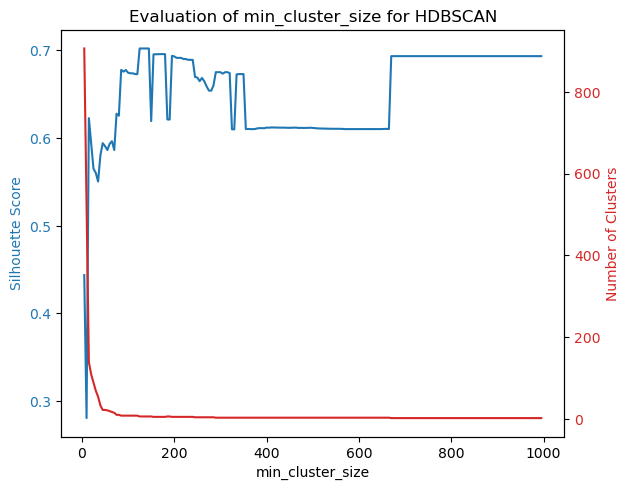

In [83]:
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('min_cluster_size')
ax1.set_ylabel('Silhouette Score', color=color)
ax1.plot(min_cluster_sizes, silhouette_scores, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # Instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Number of Clusters', color=color)  # We already handled the x-label with ax1
ax2.plot(min_cluster_sizes, cluster_counts, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # Otherwise the right y-label is slightly clipped
plt.title('Evaluation of min_cluster_size for HDBSCAN')
plt.show()

In [84]:
best_min_cluster_size = min_cluster_sizes[np.argmax(silhouette_scores)]
print(f"Best min_cluster_size: {best_min_cluster_size}")


Best min_cluster_size: 130


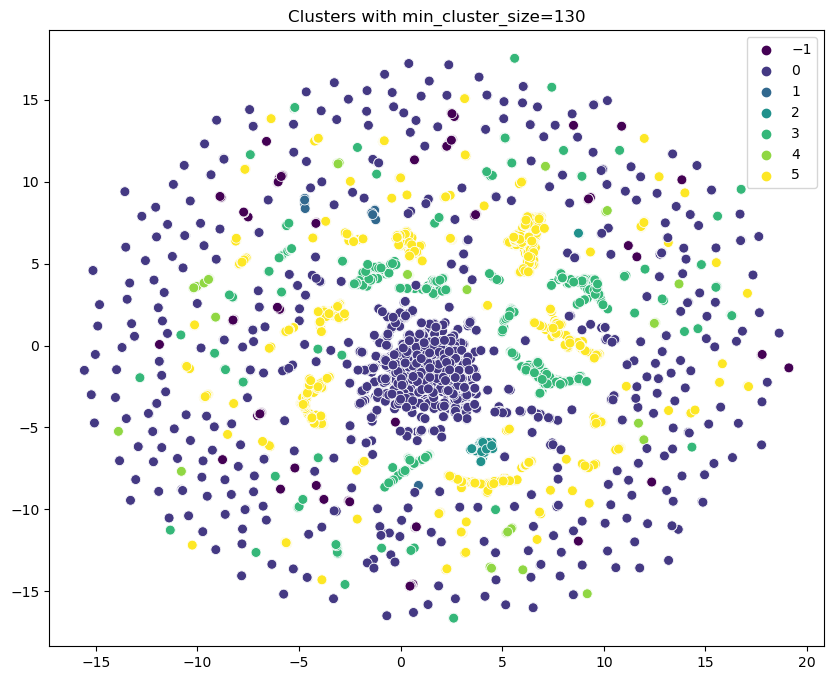

In [85]:
plot_cluster_points(best_min_cluster_size, reduced_embeddings)

In [86]:
plot_text_cluster_temp(reduced_embeddings, best_min_cluster_size, caption_df)

d:\Anaconda\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:392: UserWarning:

Exited at iteration 2000 with accuracies 
[3.70053771e-15 1.92749197e-07 1.69300736e-06 1.46474852e-05]
not reaching the requested tolerance 2.9355287551879883e-06.
Use iteration 1131 instead with accuracy 
1.1507418600681257e-06.


d:\Anaconda\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:392: UserWarning:

Exited postprocessing with accuracies 
[3.85694059e-15 2.31433199e-07 9.42356543e-07 3.42918084e-06]
not reaching the requested tolerance 2.9355287551879883e-06.

C:\Users\hp\AppData\Local\Temp\ipykernel_8040\4282420310.py:55: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



In [22]:
plot_text_cluster_temp(reduced_embeddings, 135, caption_df)

d:\Anaconda\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:392: UserWarning:

Exited at iteration 2000 with accuracies 
[2.55779595e-15 5.37702978e-07 1.10980884e-06 5.24261382e-06]
not reaching the requested tolerance 2.950429916381836e-06.
Use iteration 1198 instead with accuracy 
1.2364741743676801e-06.


d:\Anaconda\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:392: UserWarning:

Exited postprocessing with accuracies 
[2.55221174e-15 6.74590108e-07 1.28842158e-06 2.98288501e-06]
not reaching the requested tolerance 2.950429916381836e-06.

C:\Users\hp\AppData\Local\Temp\ipykernel_8040\4282420310.py:55: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix

